In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np

### Create synthetic data

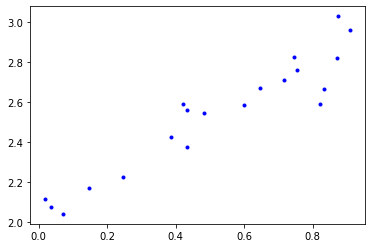

In [7]:
def MakeNoisyData(m, b, n=20):
    x = tf.random.uniform(shape=(n,))
    noise = tf.random.normal(shape=(len(x),), stddev=0.1)
    y = m*x+b+noise
    return x,y

m = 1
b = 2
x_train, y_train = MakeNoisyData(m,b)
plt.plot(x_train, y_train, 'b.');

### Define a linear regression model

In [8]:
from tensorflow.keras.layers import Layer

In [9]:
# Build a custom layer for the linear regression model

class LinearLayer(Layer):
    
    def __init__(self):
        super(LinearLayer, self).__init__()
        self.m = self.add_weight(shape=(1,),
                                initializer='random_normal')
        self.b = self.add_weight(shape=(1, ),
                                initializer='zeros')
        
    def call(self, inputs):
        return self.m * inputs + self.b
    

linear_regression = LinearLayer()

print(linear_regression(x_train))
print(linear_regression.weights)

tf.Tensor(
[0.0048856  0.01427225 0.02991734 0.02452016 0.01425129 0.00812284
 0.00121044 0.01390016 0.00065916 0.02870096 0.01277284 0.01592928
 0.00237134 0.02128702 0.02740797 0.01974689 0.0270271  0.02879119
 0.02483443 0.02362306], shape=(20,), dtype=float32)
[<tf.Variable 'Variable:0' shape=(1,) dtype=float32, numpy=array([0.03294804], dtype=float32)>, <tf.Variable 'Variable:0' shape=(1,) dtype=float32, numpy=array([0.], dtype=float32)>]


### Define the loss function

In [10]:
# Define the mean squared error loss function

def SquaredError(y_pred, y_true):
    return tf.reduce_mean(tf.square(y_pred - y_true))

starting_loss = SquaredError(linear_regression(x_train), y_train)
print("Starting loss", starting_loss.numpy())

Starting loss 6.4197555


### Train and plot the model

In [11]:
# Implement a gradient descent training loop for the linear regression model

learning_rate = 0.05
steps = 25

for i in range(steps):
    with tf.GradientTape() as tape:
        predictions = linear_regression(x_train)
        loss = SquaredError(predictions, y_train)
        
    gradients = tape.gradient(loss, linear_regression.trainable_variables)
    
    linear_regression.m.assign_sub(learning_rate * gradients[0])
    linear_regression.b.assign_sub(learning_rate * gradients[1])
    
    print("Step %d, Loss %f" % (i, loss.numpy()))

Step 0, Loss 6.419755
Step 1, Loss 4.870862
Step 2, Loss 3.696344
Step 3, Loss 2.805710
Step 4, Loss 2.130341
Step 5, Loss 1.618207
Step 6, Loss 1.229852
Step 7, Loss 0.935357
Step 8, Loss 0.712036
Step 9, Loss 0.542684
Step 10, Loss 0.414257
Step 11, Loss 0.316864
Step 12, Loss 0.243003
Step 13, Loss 0.186986
Step 14, Loss 0.144501
Step 15, Loss 0.112276
Step 16, Loss 0.087832
Step 17, Loss 0.069288
Step 18, Loss 0.055218
Step 19, Loss 0.044541
Step 20, Loss 0.036437
Step 21, Loss 0.030284
Step 22, Loss 0.025610
Step 23, Loss 0.022059
Step 24, Loss 0.019358


m:1, trained m:[1.0554268]
b:2, trained b:[1.8994765]


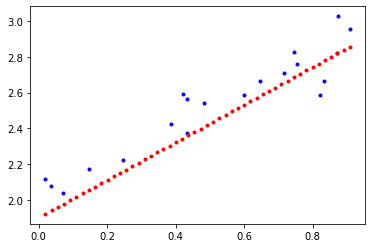

In [13]:
# Plot the learned regression model

print("m:{}, trained m:{}".format(m, linear_regression.m.numpy()))
print("b:{}, trained b:{}".format(b, linear_regression.b.numpy()))
      
plt.plot(x_train, y_train, 'b.')
      
x_linear_regression = np.linspace(min(x_train), max(x_train), 50)
plt.plot(x_linear_regression, linear_regression.m*x_linear_regression+linear_regression.b, 'r.');